# ** I am starting data curation from MoDaC available files
# March 13, 2023

In [33]:
import importlib as imp
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem

sns.set_context('paper')
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = [10,5]
#pal = sns.color_palette("Set2")
plt.rcParams['font.size'] = 5

In [34]:
import atomsci.ddm.utils.data_curation_functions as dcf
import atomsci.ddm.utils.curate_data as cd
import  atomsci.ddm.utils.struct_utils as su #import base_smiles_from_smiles, get_rdkit_smiles
from atomsci.ddm.utils.rdkit_easy import setup_notebook

In [35]:
setup_notebook()

Loading BokehJS ...

In [36]:
# Just run all cells with changing target you want
target = 'CYP2C9'

In [37]:
data_dir = "/mnt/projects/ATOM/sarkart4/MoDaC/NCI_DOE_Archive/ATOM/Safety_Screen_Targets/"+target.upper()+'-ampl-1.1.0/'
!ls $data_dir

CHEMBL25-CYP2C9_human_IC50_26Nov2019.txt
cyp2c9_chembl_testset_base_smiles_union.csv
cyp2c9_dtc_smiles_active.csv
cyp2c9_dtc_smiles_active_th5.csv
cyp2c9_dtc_smiles.csv
cyp2c9_dtc_testset_base_smiles_union_active.csv
cyp2c9_dtc_testset_base_smiles_union.csv
cyp2c9_excape_smiles_active.csv
cyp2c9_excape_smiles_active_th5.csv
cyp2c9_excape_smiles.csv
cyp2c9_excape_testset_base_smiles_union_active.csv
cyp2c9_excape_testset_base_smiles_union.csv
cyp2c9_union_testset_base_smiles.csv
cyp2c9_union_trainset_base_smiles.csv
cyp2c9_union_trainset_base_smiles_train_valid_test_scaffold_41d32748-810d-4cd2-9cdb-124b77f657f8.csv
scaled_descriptors


In [38]:
file= data_dir + 'CHEMBL25-'+target.upper()+'_human_IC50_26Nov2019.txt' # exisitng MoDaC raw
chembl_raw_df=pd.read_csv(file,sep=";",engine="python",error_bad_lines=False) # Note that my orig_df is MoDaC files, you should use the raw file downloaded form ExcapeDB
print(chembl_raw_df.shape)
chembl_raw_df.head()

/home/sarkart4/miniconda3/envs/ampl-1.4.1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3343: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


(5081, 41)


,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Data Validity Comment,Comment,Uo Units,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,Potential Duplicate,Assay ChEMBL ID,Assay Description,Assay Type,BAO Format ID,BAO Label,Assay Organism,Assay Tissue ChEMBL ID,Assay Tissue Name,Assay Cell Type,Assay Subcellular Fraction,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID
0,CHEMBL1289396,NaN,0,399.49,0.0,3.90,12b,CN1CCc2c(C1)n(C)c3cc(ccc23)N4C=CC(=CC4=O)OCc5c...,IC50,'>',10000.0,nM,NaN,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL1292290,Inhibition of CYP2C9,A,BAO_0000357,single protein format,NaN,NaN,NaN,NaN,NaN,CHEMBL3397,Cytochrome P450 2C9,Homo sapiens,SINGLE PROTEIN,CHEMBL1287681,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2010.0,NaN
1,CHEMBL1223259,NaN,0,554.91,2.0,6.41,17s,CC(C)(C)c1nnc(s1)c2nn(c3ccccc3Cl)c(c2Cn4cncn4)...,IC50,'>',20.0,nM,NaN,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL1227229,Inhibition of CYP2C9 in human liver microsomes...,A,BAO_0000251,microsome format,Homo sapiens,CHEMBL3559723,Liver,NaN,Microsome,CHEMBL3397,Cytochrome P450 2C9,Homo sapiens,SINGLE PROTEIN,CHEMBL1221281,1,Scientific Literature,Bioorg. Med. Chem.,2010.0,NaN
2,CHEMBL1241738,NaN,0,440.55,0.0,3.69,11,Cc1ccc2c(cccc2n1)N3CCN(CCc4cccc5c4OCc6nnc(C)n5...,IC50,'>',10000.0,nM,NaN,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL1248644,Inhibition of human recombinant CYP2C9 preincu...,A,BAO_0000357,single protein format,Homo sapiens,NaN,NaN,NaN,NaN,CHEMBL3397,Cytochrome P450 2C9,Homo sapiens,SINGLE PROTEIN,CHEMBL1240442,1,Scientific Literature,J. Med. Chem.,2010.0,NaN
3,CHEMBL536086,NaN,0,412.87,0.0,3.55,29b,Cl.NC1CN(CC1c2cc(F)c(F)cc2F)c3cc(ncn3)c4ccsc4,IC50,'>',10000.0,nM,NaN,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL903589,Inhibition of CYP2C9,A,BAO_0000357,single protein format,NaN,NaN,NaN,NaN,NaN,CHEMBL3397,Cytochrome P450 2C9,Homo sapiens,SINGLE PROTEIN,CHEMBL1139138,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2007.0,NaN
4,CHEMBL398160,NaN,0,369.36,0.0,2.00,22,OCc1ccc(cn1)c2ccc(cc2F)N3C[C@H](Cn4ccnn4)OC3=O,IC50,'>',20000.0,nM,NaN,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL896269,Inhibition of human recombinant CYP2C9,A,BAO_0000357,single protein format,Homo sapiens,NaN,NaN,NaN,NaN,CHEMBL3397,Cytochrome P450 2C9,Homo sapiens,SINGLE PROTEIN,CHEMBL1148787,1,Scientific Literature,J. Med. Chem.,2007.0,NaN


In [39]:
chembl_raw_df.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID'],
      dtype='object')

In [40]:
print("Target ChEMBL ID=", chembl_raw_df['Target ChEMBL ID'].unique())
print("Target Name=", chembl_raw_df['Target Name'].unique())
print("Target Organism=", chembl_raw_df['Target Organism'].unique())

Target ChEMBL ID= ['CHEMBL3397']
Target Name= ['Cytochrome P450 2C9']
Target Organism= ['Homo sapiens']


In [41]:
print("Standard Type=", chembl_raw_df['Standard Type'].unique())
print("Standard Relation=", chembl_raw_df['Standard Relation'].unique())
print("Standard Value=", chembl_raw_df['Standard Value'].unique())
print("Standard Units=", chembl_raw_df['Standard Units'].unique())
print("pChEMBL Value=", chembl_raw_df['pChEMBL Value'].unique()) # actuallu pIC50

Standard Type= ['IC50']
Standard Relation= ["'>'" "'='" nan "'<'" "'>='" "'<='"]
Standard Value= [1.00000000e+04 2.00000000e+01 2.00000000e+04 2.80000000e+03
 1.60000000e+04 2.60000000e+04 8.00000000e+03 3.30000000e+04
 3.00000000e+02            nan 1.00000000e+03 4.30000000e+04
 2.00000000e+05 1.88800000e+03 6.30957000e+03 5.52000000e+04
 4.00000000e+02 3.68000000e+04 1.50000000e+04 1.63000000e+04
 3.98107200e+04 1.00000000e+05 2.00000000e+03 3.16230000e+02
 9.00000000e+04 5.00000000e+04 7.30000000e+03 7.00000000e+03
 1.99526200e+04 2.20000000e+04 2.10000000e+04 9.00000000e+03
 3.65000000e+04 1.25000000e+04 4.00000000e+04 2.50000000e+03
 2.00000000e+02 1.20000000e+04 4.10000000e+04 6.00000000e+04
 2.40000000e+04 1.50000000e+03 3.60000000e+03 9.50000000e+03
 4.60000000e+01 1.10000000e+04 6.00000000e+03 5.00000000e+03
 2.10000000e+03 3.45000000e+02 1.70000000e+03 6.60000000e+04
 5.00000000e+01 1.14000000e+04 1.00000000e+02 3.50000000e+02
 1.10000000e+03 7.20000000e+02 4.20000000e+03 9.8

In [42]:
#rename 'pChEMBL Value' column to 'pIC50'
chembl_raw_df = chembl_raw_df.rename(columns={'pChEMBL Value':'pIC50', 'Molecule ChEMBL ID':'compound_id', 'Standard Relation':'standard_relation', 'Standard Value':'standard_value',
                                             'Standard Type':'standard_type', 'Standard Units':'standard_units'})

In [43]:
# standardize smiles -> Add standardized desalted RDKit SMILES strings
chembl_raw_df['rdkit_smiles'] = su.base_smiles_from_smiles(chembl_raw_df.Smiles.values.tolist(), workers=16) # Note: if you do not want to strip salt, please use ddm.utils.structUtils.get_rdkit_smiles(s)

In [44]:
# #Get standard InchikEY 
imp.reload(Chem)
chembl_raw_df['standard_inchi_key'] = [Chem.MolToInchi(Chem.MolFromSmiles(smiles)) for smiles in chembl_raw_df['rdkit_smiles'].to_list()]

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Charges were rearranged; Omitted undefined stereo

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Charges were rearranged

[00:26:09] WARNING: Charges were rearranged

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Proton(s) added/removed

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Charges were rearranged

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Omitted undefined stereo

[00:26:09] WARNING: Omitted undefined 

[00:26:10] WARNING: Omitted undefined stereo

[00:26:10] WARNING: Omitted undefined stereo

[00:26:10] WARNING: Omitted undefined stereo

[00:26:10] WARNING: Omitted undefined stereo

[00:26:10] WARNING: Omitted undefined stereo

[00:26:10] WARNING: Omitted undefined stereo

[00:26:10] WARNING: Omitted undefined stereo

[00:26:10] WARNING: Omitted undefined stereo

[00:26:10] WARNING: Omitted undefined stereo

[00:26:10] WARNING: Omitted undefined stereo

[00:26:10] WARNING: Omitted undefined stereo

[00:26:10] WARNING: Omitted undefined stereo

[00:26:10] WARNING: Omitted undefined stereo

[00:26:10] WARNING: Omitted undefined stereo

[00:26:10] WARNING: Omitted undefined stereo

[00:26:10] WARNING: Omitted undefined stereo

[00:26:10] WARNING: Omitted undefined stereo

[00:26:10] WARNING: Omitted undefined stereo

[00:26:10] WARNING: Omitted undefined stereo

[00:26:10] WARNING: Omitted undefined stereo

[00:26:10] WARNING: Omitted undefined stereo

[00:26:10] WARNING: Charges were r

[00:26:11] WARNING: Omitted undefined stereo

[00:26:11] WARNING: Omitted undefined stereo

[00:26:11] WARNING: Charges were rearranged

[00:26:11] WARNING: Omitted undefined stereo

[00:26:11] WARNING: Omitted undefined stereo

[00:26:11] WARNING: Omitted undefined stereo

[00:26:11] WARNING: Omitted undefined stereo

[00:26:11] WARNING: Omitted undefined stereo

[00:26:11] ERROR: Empty structure

[00:26:11] WARNING: Proton(s) added/removed

[00:26:11] WARNING: Charges were rearranged; Omitted undefined stereo

[00:26:11] WARNING: Omitted undefined stereo

[00:26:11] WARNING: Omitted undefined stereo

[00:26:11] WARNING: Omitted undefined stereo

[00:26:11] WARNING: Omitted undefined stereo

[00:26:11] WARNING: Omitted undefined stereo

[00:26:11] WARNING: Charges were rearranged; Omitted undefined stereo

[00:26:11] WARNING: Omitted undefined stereo

[00:26:11] WARNING: Omitted undefined stereo

[00:26:11] WARNING: Omitted undefined stereo

[00:26:11] WARNING: Omitted undefined stere

In [45]:
chembl_raw_df = chembl_raw_df[chembl_raw_df.rdkit_smiles != '']
chembl_raw_df = chembl_raw_df[~chembl_raw_df['rdkit_smiles'].isna()]
chembl_raw_df = chembl_raw_df[~chembl_raw_df['standard_value'].isna()]
chembl_raw_df = chembl_raw_df[~chembl_raw_df['pIC50'].isna()]

In [46]:
print(chembl_raw_df.apply(lambda col: col.unique()))

compound_id                   [CHEMBL236162, CHEMBL241970, CHEMBL397230, CHE...
Molecule Name                 [nan, RO-3201195, CURCUMIN, DESETHYL AMODIAQUI...
Molecule Max Phase                                              [0, 1, 4, 2, 3]
Molecular Weight              [402.86, 380.39, 364.39, 447.43, 750.82, 220.3...
#RO5 Violations                                       [0.0, 1.0, 2.0, nan, 3.0]
AlogP                         [4.44, 4.27, 4.6, 2.58, 3.86, 3.64, 5.36, 4.47...
Compound Key                  [2g, 6, 5, 8, 3h, 14c, 1j, 11, 5g, 13, 9d, 38,...
Smiles                        [OC(=O)c1ccccc1NC(=O)CCc2cnc(s2)c3ccc(O)cc3Cl,...
standard_type                                                            [IC50]
standard_relation                                                         ['=']
standard_value                [2800.0, 16000.0, 26000.0, 8000.0, 33000.0, 30...
standard_units                                                             [nM]
pIC50                         [5.55, 4.8


### Apply standard ATOM curation steps

In [47]:
imp.reload(dcf)
data=chembl_raw_df
column = 'pIC50'
tolerance = 10
list_bad_duplicates = 'Yes'
max_std = 1
compound_id = 'compound_id'
smiles_col = 'rdkit_smiles'
check_df = cd.average_and_remove_duplicates(column, tolerance, 
                                                     list_bad_duplicates, 
                                                     data, 
                                                     max_std, 
                                                     compound_id=compound_id, 
                                                     smiles_col=smiles_col)
[check_df.shape]
check_df.head()

Bad duplicates removed from dataset
Dataframe size (2053, 47)
List of 'bad' duplicates removed
        compound_id  pIC50  VALUE_NUM_mean   Perc_Var  VALUE_NUM_std
1535     CHEMBL1109   7.10        6.365000  11.547526       0.532477
1631     CHEMBL1109   5.38        6.365000  15.475255       0.532477
1828     CHEMBL1109   5.00        6.365000  21.445405       0.532477
2055     CHEMBL1109   5.38        6.365000  15.475255       0.532477
728       CHEMBL163   7.80        6.555000  18.993135       1.760696
2015      CHEMBL163   5.31        6.555000  18.993135       1.760696
961     CHEMBL16596   9.30        7.800000  19.230769       2.121320
1989    CHEMBL16596   6.30        7.800000  19.230769       2.121320
1280  CHEMBL3260358   7.16        6.240000  14.743590       1.301076
1356  CHEMBL3260358   5.32        6.240000  14.743590       1.301076
1414  CHEMBL4073429   4.92        5.763333  14.632736       0.733235
833    CHEMBL485967   5.85        5.193333  12.644416       0.576570

Dataset

,compound_id,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,standard_type,standard_relation,standard_value,standard_units,pIC50,Data Validity Comment,Comment,Uo Units,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,Potential Duplicate,Assay ChEMBL ID,Assay Description,Assay Type,BAO Format ID,BAO Label,Assay Organism,Assay Tissue ChEMBL ID,Assay Tissue Name,Assay Cell Type,Assay Subcellular Fraction,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,rdkit_smiles,standard_inchi_key,VALUE_NUM_mean,VALUE_NUM_std,Perc_Var,Remove_BadDuplicate
0,CHEMBL236162,NaN,0,402.86,0.0,4.44,2g,OC(=O)c1ccccc1NC(=O)CCc2cnc(s2)c3ccc(O)cc3Cl,IC50,'=',2800.0,nM,5.55,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL900201,Inhibition of CYP2C9 in human liver microsomes,A,BAO_0000251,microsome format,Homo sapiens,CHEMBL3559723,Liver,NaN,Microsome,CHEMBL3397,Cytochrome P450 2C9,Homo sapiens,SINGLE PROTEIN,CHEMBL1138322,1,Scientific Literature,J. Med. Chem.,2007.0,NaN,O=C(CCc1cnc(-c2ccc(O)cc2Cl)s1)Nc1ccccc1C(=O)O,InChI=1S/C19H15ClN2O4S/c20-15-9-11(23)5-7-13(1...,5.55,NaN,0.0,0
1,CHEMBL241970,NaN,0,380.39,0.0,4.27,6,Cc1ccc(cc1)c2cc(nn2c3ccc(cc3)S(=O)(=O)C)C(F)(F)F,IC50,'=',16000.0,nM,4.80,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL899614,Inhibition of recombinant CYP2C9 by fluorescen...,A,BAO_0000357,single protein format,NaN,NaN,NaN,NaN,NaN,CHEMBL3397,Cytochrome P450 2C9,Homo sapiens,SINGLE PROTEIN,CHEMBL1137572,1,Scientific Literature,J. Med. Chem.,2007.0,NaN,Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(C)(=O)=O)cc2...,InChI=1S/C18H15F3N2O2S/c1-12-3-5-13(6-4-12)16-...,4.80,NaN,0.0,0
2,CHEMBL397230,NaN,0,364.39,0.0,4.60,5,C[S+]([O-])c1ccc(cc1)n2nc(cc2c3ccc(C)cc3)C(F)(F)F,IC50,'=',26000.0,nM,4.58,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL899614,Inhibition of recombinant CYP2C9 by fluorescen...,A,BAO_0000357,single protein format,NaN,NaN,NaN,NaN,NaN,CHEMBL3397,Cytochrome P450 2C9,Homo sapiens,SINGLE PROTEIN,CHEMBL1137572,1,Scientific Literature,J. Med. Chem.,2007.0,NaN,Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc([S+](C)[O-])cc...,InChI=1S/C18H15F3N2OS/c1-12-3-5-13(6-4-12)16-1...,4.58,NaN,0.0,0
3,CHEMBL230964,NaN,0,447.43,0.0,2.58,8,Fc1cc(ccc1c2ccc(nc2)C(=O)Cn3ccnc3)N4C[C@H](Cn5...,IC50,'=',8000.0,nM,5.10,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL896269,Inhibition of human recombinant CYP2C9,A,BAO_0000357,single protein format,Homo sapiens,NaN,NaN,NaN,NaN,CHEMBL3397,Cytochrome P450 2C9,Homo sapiens,SINGLE PROTEIN,CHEMBL1148787,1,Scientific Literature,J. Med. Chem.,2007.0,NaN,O=C(Cn1ccnc1)c1ccc(-c2ccc(N3C[C@H](Cn4ccnn4)OC...,InChI=1S/C22H18FN7O3/c23-19-9-16(30-12-17(33-2...,5.10,NaN,0.0,0
4,CHEMBL3706613,NaN,0,750.82,1.0,3.86,8,CC(C)(N1CCN(C[C@@H](O)C[C@@H](Cc2ccccc2)C(=O)N...,IC50,'=',33000.0,nM,4.48,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL660396,Inhibition of human liver microsome Cytochrome...,A,BAO_0000221,tissue-based format,Homo sapiens,CHEMBL3559723,Liver,NaN,NaN,CHEMBL3397,Cytochrome P450 2C9,Homo sapiens,SINGLE PROTEIN,CHEMBL1136139,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2003.0,NaN,CC(C)(c1ncc(-c2cccnc2)o1)N1CCN(C[C@@H](O)C[C@@...,"InChI=1S/C39H45F3N6O6/c1-38(2,37-44-20-33(54-3...",4.48,NaN,0.0,0


In [48]:
check_df.columns

Index(['compound_id', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'standard_type', 'standard_relation', 'standard_value',
       'standard_units', 'pIC50', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'rdkit_smiles',
       'standard_inchi_key', 'VALUE_NUM_mean', 'VALUE_NUM_std', 'Perc_Var',
       'Remove_BadDuplicate'],
      dtype='object')

Post-processing dataset

Total Number of results = 1891
dataset mean = 5.339888947646748 NM
dataset stdev = 0.756458777357196 NM
dataset max = 9.03 NM
dataset min = 4.0 NM



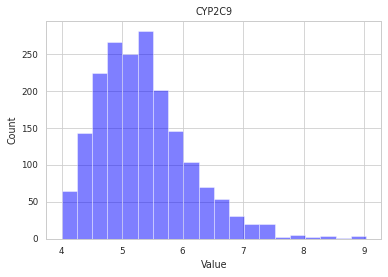

In [49]:
imp.reload(cd)
targ_lst = [target.upper()]
column = 'pIC50'
num_bins = 20
units = 'NM'
filepath = ""
for it in range(len(targ_lst)) :
    title = targ_lst[it]
    data=check_df
    cd.summarize_data(column, num_bins, title, units, filepath, data)

## Use Kevin's "aggregate_assay_data()" 

In [50]:
imp.reload(cd)
tolerance=10
column='pIC50'   #'pXC50'; #'standard_value'
list_bad_duplicates='Yes'
max_std=1
agg_data=check_df
data=agg_data
print("before",data.shape)
temp_df=cd.aggregate_assay_data(data, value_col=column, output_value_col=None,
                             label_actives=True,
                             active_thresh=6, # val > 6 -> 'active' (drug-like compounds) # can be - None(default)| This creates 'active' column based on pIC50 value. Rule used here: pIC50 >=6 'active', labelled as 0, else 1
                             id_col='compound_id', smiles_col='rdkit_smiles', relation_col='standard_relation')
# Remove inf in curated_df
temp_df = temp_df[~temp_df.isin([np.inf]).any(1)]
print("after",temp_df.shape)
temp_df.head()

before (1891, 47)
after (1891, 5)


,compound_id,base_rdkit_smiles,relation,pIC50,active
0,CHEMBL3298322,COc1cc2ccnc(Oc3ccc(F)cc3)c2cc1OC,,5.72,0
1,CHEMBL3672842,CCN(c1cc(C#CC2CCN(C)CC2)cc(C(=O)NCc2c(C)cc(C)[...,,4.12,0
2,CHEMBL2419518,CC(C)n1cc(S(=O)(=O)c2ccc(CNC(=O)N3Cc4ccncc4C3)...,,7.14,1
3,CHEMBL496227,Cc1cccc(C)c1CNc1cc(-n2cnc(CO)n2)cn2c(C)c(C)nc12,,5.07,0
4,CHEMBL2393177,Cc1cncc(CNC(=O)Nc2ccc(S(=O)(=O)N3CCOCC3)cc2)c1,,6.19,1


In [51]:
# Add 'active' column to original data and save file to FRCE
merged = pd.merge(left=chembl_raw_df, right=temp_df, how='left', left_on='rdkit_smiles', right_on='base_rdkit_smiles')
merged = merged.drop(columns=['pIC50_y', 'base_rdkit_smiles', 'compound_id_y'])
merged = merged.rename(columns={'pIC50_x':'pIC50', 'compound_id_x':'compound_id'})
print(merged.columns)
merged.head(5)

Index(['compound_id', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'standard_type', 'standard_relation', 'standard_value',
       'standard_units', 'pIC50', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'rdkit_smiles',
       'standard_inchi_key', 'relation', 'active'],
      dtype='object')


,compound_id,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,standard_type,standard_relation,standard_value,standard_units,pIC50,Data Validity Comment,Comment,Uo Units,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,Potential Duplicate,Assay ChEMBL ID,Assay Description,Assay Type,BAO Format ID,BAO Label,Assay Organism,Assay Tissue ChEMBL ID,Assay Tissue Name,Assay Cell Type,Assay Subcellular Fraction,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,rdkit_smiles,standard_inchi_key,relation,active
0,CHEMBL236162,NaN,0,402.86,0.0,4.44,2g,OC(=O)c1ccccc1NC(=O)CCc2cnc(s2)c3ccc(O)cc3Cl,IC50,'=',2800.0,nM,5.55,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL900201,Inhibition of CYP2C9 in human liver microsomes,A,BAO_0000251,microsome format,Homo sapiens,CHEMBL3559723,Liver,NaN,Microsome,CHEMBL3397,Cytochrome P450 2C9,Homo sapiens,SINGLE PROTEIN,CHEMBL1138322,1,Scientific Literature,J. Med. Chem.,2007.0,NaN,O=C(CCc1cnc(-c2ccc(O)cc2Cl)s1)Nc1ccccc1C(=O)O,InChI=1S/C19H15ClN2O4S/c20-15-9-11(23)5-7-13(1...,,0.0
1,CHEMBL241970,NaN,0,380.39,0.0,4.27,6,Cc1ccc(cc1)c2cc(nn2c3ccc(cc3)S(=O)(=O)C)C(F)(F)F,IC50,'=',16000.0,nM,4.80,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL899614,Inhibition of recombinant CYP2C9 by fluorescen...,A,BAO_0000357,single protein format,NaN,NaN,NaN,NaN,NaN,CHEMBL3397,Cytochrome P450 2C9,Homo sapiens,SINGLE PROTEIN,CHEMBL1137572,1,Scientific Literature,J. Med. Chem.,2007.0,NaN,Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(C)(=O)=O)cc2...,InChI=1S/C18H15F3N2O2S/c1-12-3-5-13(6-4-12)16-...,,0.0
2,CHEMBL397230,NaN,0,364.39,0.0,4.60,5,C[S+]([O-])c1ccc(cc1)n2nc(cc2c3ccc(C)cc3)C(F)(F)F,IC50,'=',26000.0,nM,4.58,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL899614,Inhibition of recombinant CYP2C9 by fluorescen...,A,BAO_0000357,single protein format,NaN,NaN,NaN,NaN,NaN,CHEMBL3397,Cytochrome P450 2C9,Homo sapiens,SINGLE PROTEIN,CHEMBL1137572,1,Scientific Literature,J. Med. Chem.,2007.0,NaN,Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc([S+](C)[O-])cc...,InChI=1S/C18H15F3N2OS/c1-12-3-5-13(6-4-12)16-1...,,0.0
3,CHEMBL230964,NaN,0,447.43,0.0,2.58,8,Fc1cc(ccc1c2ccc(nc2)C(=O)Cn3ccnc3)N4C[C@H](Cn5...,IC50,'=',8000.0,nM,5.10,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL896269,Inhibition of human recombinant CYP2C9,A,BAO_0000357,single protein format,Homo sapiens,NaN,NaN,NaN,NaN,CHEMBL3397,Cytochrome P450 2C9,Homo sapiens,SINGLE PROTEIN,CHEMBL1148787,1,Scientific Literature,J. Med. Chem.,2007.0,NaN,O=C(Cn1ccnc1)c1ccc(-c2ccc(N3C[C@H](Cn4ccnn4)OC...,InChI=1S/C22H18FN7O3/c23-19-9-16(30-12-17(33-2...,,0.0
4,CHEMBL3706613,NaN,0,750.82,1.0,3.86,8,CC(C)(N1CCN(C[C@@H](O)C[C@@H](Cc2ccccc2)C(=O)N...,IC50,'=',33000.0,nM,4.48,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL660396,Inhibition of human liver microsome Cytochrome...,A,BAO_0000221,tissue-based format,Homo sapiens,CHEMBL3559723,Liver,NaN,NaN,CHEMBL3397,Cytochrome P450 2C9,Homo sapiens,SINGLE PROTEIN,CHEMBL1136139,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2003.0,NaN,CC(C)(c1ncc(-c2cccnc2)o1)N1CCN(C[C@@H](O)C[C@@...,"InChI=1S/C39H45F3N6O6/c1-38(2,37-44-20-33(54-3...",,0.0


In [52]:
merged.active.value_counts()

0.0    1702
1.0     357
Name: active, dtype: int64

In [53]:
merged.to_csv(data_dir +target.lower()+'_chembl_smiles_active.csv')

# Add 'active' column to testset

In [54]:
chembl_raw_active = pd.read_csv(data_dir + target.lower()+'_chembl_smiles_active.csv' ,sep=",")
print(chembl_raw_active.shape)
chembl_raw_active.head(2)

(2065, 46)


,Unnamed: 0,compound_id,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,standard_type,standard_relation,standard_value,standard_units,pIC50,Data Validity Comment,Comment,Uo Units,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,Potential Duplicate,Assay ChEMBL ID,Assay Description,Assay Type,BAO Format ID,BAO Label,Assay Organism,Assay Tissue ChEMBL ID,Assay Tissue Name,Assay Cell Type,Assay Subcellular Fraction,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,rdkit_smiles,standard_inchi_key,relation,active
0,0,CHEMBL236162,NaN,0,402.86,0.0,4.44,2g,OC(=O)c1ccccc1NC(=O)CCc2cnc(s2)c3ccc(O)cc3Cl,IC50,'=',2800.0,nM,5.55,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL900201,Inhibition of CYP2C9 in human liver microsomes,A,BAO_0000251,microsome format,Homo sapiens,CHEMBL3559723,Liver,NaN,Microsome,CHEMBL3397,Cytochrome P450 2C9,Homo sapiens,SINGLE PROTEIN,CHEMBL1138322,1,Scientific Literature,J. Med. Chem.,2007.0,NaN,O=C(CCc1cnc(-c2ccc(O)cc2Cl)s1)Nc1ccccc1C(=O)O,InChI=1S/C19H15ClN2O4S/c20-15-9-11(23)5-7-13(1...,NaN,0.0
1,1,CHEMBL241970,NaN,0,380.39,0.0,4.27,6,Cc1ccc(cc1)c2cc(nn2c3ccc(cc3)S(=O)(=O)C)C(F)(F)F,IC50,'=',16000.0,nM,4.80,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL899614,Inhibition of recombinant CYP2C9 by fluorescen...,A,BAO_0000357,single protein format,NaN,NaN,NaN,NaN,NaN,CHEMBL3397,Cytochrome P450 2C9,Homo sapiens,SINGLE PROTEIN,CHEMBL1137572,1,Scientific Literature,J. Med. Chem.,2007.0,NaN,Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(C)(=O)=O)cc2...,InChI=1S/C18H15F3N2O2S/c1-12-3-5-13(6-4-12)16-...,NaN,0.0


In [55]:
chembl_test_df = pd.read_csv(data_dir + target.lower()+'_chembl_testset_base_smiles_union.csv' ,sep=",")
chembl_test_df.active.value_counts()

1    335
0    324
Name: active, dtype: int64

In [56]:
chembl_test_df.shape

(659, 5)

In [57]:
chembl_test_df = chembl_test_df.drop(columns = ['active'])
print(chembl_test_df.shape) # Note: wrong 'active' column, will be marked correctly in next step
chembl_test_df.head(2)

(659, 4)


,base_rdkit_smiles,compound_id,pIC50,relation
0,Cc1nc(C)c(CNc2nc(OCCCc3ccc4ccccc4n3)nc(Cl)c2C)s1,CHEMBL3622898,6.522879,NaN
1,Cc1cccc(C)c1CNc1cc(-c2c[nH]c(=O)[nH]c2=O)cn2c(...,CHEMBL496806,5.468521,NaN


In [58]:
# Add 'active' column and save file to FRCE
#merged = pd.merge(left=dtc_test_df, right=dtc_raw_active, how='left', left_on='base_rdkit_smiles', right_on='rdkit_smiles')
merged = chembl_test_df.merge(chembl_raw_active[['rdkit_smiles', 'active']], how = 'left', 
                           left_on = 'base_rdkit_smiles', right_on = 'rdkit_smiles').drop(columns = ['rdkit_smiles'])
print(merged.shape)
merged.head(2)

(683, 5)


,base_rdkit_smiles,compound_id,pIC50,relation,active
0,Cc1nc(C)c(CNc2nc(OCCCc3ccc4ccccc4n3)nc(Cl)c2C)s1,CHEMBL3622898,6.522879,NaN,1.0
1,Cc1cccc(C)c1CNc1cc(-c2c[nH]c(=O)[nH]c2=O)cn2c(...,CHEMBL496806,5.468521,NaN,0.0


In [59]:
merged.active.value_counts()

0.0    280
1.0     60
Name: active, dtype: int64

In [60]:
merged.to_csv(data_dir +target.lower()+'_chembl_testset_base_smiles_union_active.csv')

# Plot pIC50 for 'Active' column from our labelling (column='active')

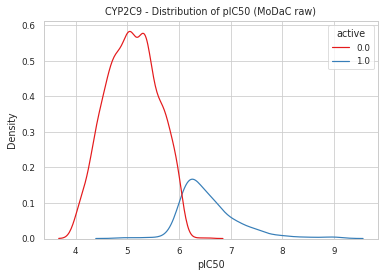

In [61]:
#plot pIC50 distribution based on our 'active' labelling (ModDaC raw)
raw = pd.read_csv(data_dir +target.lower()+'_chembl_smiles_active.csv')
fig, ax = plt.subplots(figsize = (6,4))
sns.kdeplot(data=raw, x="pIC50", hue="active", palette="Set1")
plt.title(target.upper()+' - Distribution of pIC50 (MoDaC raw)')
plt.xlabel('pIC50')
plt.show()

# Use active_threashold=5 in aggregate_assay_data()

In [62]:
imp.reload(cd)
tolerance=10
column='pIC50'   #'pXC50'; #'standard_value'
list_bad_duplicates='Yes'
max_std=1
agg_data=check_df
data=agg_data
print("before",data.shape)
temp_df1=cd.aggregate_assay_data(data, value_col=column, output_value_col=None,
                             label_actives=True,
                             active_thresh=5, # val > 5 -> 'active' (drug-like compounds) # can be - None(default)| This creates 'active' column based on pIC50 value. Rule used here: pIC50 >=6 'active', labelled as 0, else 1
                             id_col='compound_id', smiles_col='rdkit_smiles', relation_col='standard_relation')
# Remove inf in curated_df
temp_df1 = temp_df1[~temp_df1.isin([np.inf]).any(1)]
print("after",temp_df1.shape)
temp_df1.head()

before (1891, 47)
after (1891, 5)


,compound_id,base_rdkit_smiles,relation,pIC50,active
0,CHEMBL3298322,COc1cc2ccnc(Oc3ccc(F)cc3)c2cc1OC,,5.72,1
1,CHEMBL3672842,CCN(c1cc(C#CC2CCN(C)CC2)cc(C(=O)NCc2c(C)cc(C)[...,,4.12,0
2,CHEMBL2419518,CC(C)n1cc(S(=O)(=O)c2ccc(CNC(=O)N3Cc4ccncc4C3)...,,7.14,1
3,CHEMBL496227,Cc1cccc(C)c1CNc1cc(-n2cnc(CO)n2)cn2c(C)c(C)nc12,,5.07,1
4,CHEMBL2393177,Cc1cncc(CNC(=O)Nc2ccc(S(=O)(=O)N3CCOCC3)cc2)c1,,6.19,1


In [63]:
# Add 'active' column to original data and save file to FRCE
merged = pd.merge(left=chembl_raw_df, right=temp_df1, how='left', left_on='rdkit_smiles', right_on='base_rdkit_smiles')
merged = merged.drop(columns=['pIC50_y', 'base_rdkit_smiles', 'compound_id_y'])
merged = merged.rename(columns={'pIC50_x':'pIC50', 'compound_id_x':'compound_id'})
print(merged.shape)
print(merged.active.value_counts())
merged.to_csv(data_dir +target.lower()+'_chembl_smiles_active_th5.csv')
merged.head(5)

(2065, 45)
1.0    1304
0.0     755
Name: active, dtype: int64


,compound_id,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,standard_type,standard_relation,standard_value,standard_units,pIC50,Data Validity Comment,Comment,Uo Units,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,Potential Duplicate,Assay ChEMBL ID,Assay Description,Assay Type,BAO Format ID,BAO Label,Assay Organism,Assay Tissue ChEMBL ID,Assay Tissue Name,Assay Cell Type,Assay Subcellular Fraction,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,rdkit_smiles,standard_inchi_key,relation,active
0,CHEMBL236162,NaN,0,402.86,0.0,4.44,2g,OC(=O)c1ccccc1NC(=O)CCc2cnc(s2)c3ccc(O)cc3Cl,IC50,'=',2800.0,nM,5.55,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL900201,Inhibition of CYP2C9 in human liver microsomes,A,BAO_0000251,microsome format,Homo sapiens,CHEMBL3559723,Liver,NaN,Microsome,CHEMBL3397,Cytochrome P450 2C9,Homo sapiens,SINGLE PROTEIN,CHEMBL1138322,1,Scientific Literature,J. Med. Chem.,2007.0,NaN,O=C(CCc1cnc(-c2ccc(O)cc2Cl)s1)Nc1ccccc1C(=O)O,InChI=1S/C19H15ClN2O4S/c20-15-9-11(23)5-7-13(1...,,1.0
1,CHEMBL241970,NaN,0,380.39,0.0,4.27,6,Cc1ccc(cc1)c2cc(nn2c3ccc(cc3)S(=O)(=O)C)C(F)(F)F,IC50,'=',16000.0,nM,4.80,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL899614,Inhibition of recombinant CYP2C9 by fluorescen...,A,BAO_0000357,single protein format,NaN,NaN,NaN,NaN,NaN,CHEMBL3397,Cytochrome P450 2C9,Homo sapiens,SINGLE PROTEIN,CHEMBL1137572,1,Scientific Literature,J. Med. Chem.,2007.0,NaN,Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(C)(=O)=O)cc2...,InChI=1S/C18H15F3N2O2S/c1-12-3-5-13(6-4-12)16-...,,0.0
2,CHEMBL397230,NaN,0,364.39,0.0,4.60,5,C[S+]([O-])c1ccc(cc1)n2nc(cc2c3ccc(C)cc3)C(F)(F)F,IC50,'=',26000.0,nM,4.58,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL899614,Inhibition of recombinant CYP2C9 by fluorescen...,A,BAO_0000357,single protein format,NaN,NaN,NaN,NaN,NaN,CHEMBL3397,Cytochrome P450 2C9,Homo sapiens,SINGLE PROTEIN,CHEMBL1137572,1,Scientific Literature,J. Med. Chem.,2007.0,NaN,Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc([S+](C)[O-])cc...,InChI=1S/C18H15F3N2OS/c1-12-3-5-13(6-4-12)16-1...,,0.0
3,CHEMBL230964,NaN,0,447.43,0.0,2.58,8,Fc1cc(ccc1c2ccc(nc2)C(=O)Cn3ccnc3)N4C[C@H](Cn5...,IC50,'=',8000.0,nM,5.10,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL896269,Inhibition of human recombinant CYP2C9,A,BAO_0000357,single protein format,Homo sapiens,NaN,NaN,NaN,NaN,CHEMBL3397,Cytochrome P450 2C9,Homo sapiens,SINGLE PROTEIN,CHEMBL1148787,1,Scientific Literature,J. Med. Chem.,2007.0,NaN,O=C(Cn1ccnc1)c1ccc(-c2ccc(N3C[C@H](Cn4ccnn4)OC...,InChI=1S/C22H18FN7O3/c23-19-9-16(30-12-17(33-2...,,1.0
4,CHEMBL3706613,NaN,0,750.82,1.0,3.86,8,CC(C)(N1CCN(C[C@@H](O)C[C@@H](Cc2ccccc2)C(=O)N...,IC50,'=',33000.0,nM,4.48,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL660396,Inhibition of human liver microsome Cytochrome...,A,BAO_0000221,tissue-based format,Homo sapiens,CHEMBL3559723,Liver,NaN,NaN,CHEMBL3397,Cytochrome P450 2C9,Homo sapiens,SINGLE PROTEIN,CHEMBL1136139,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2003.0,NaN,CC(C)(c1ncc(-c2cccnc2)o1)N1CCN(C[C@@H](O)C[C@@...,"InChI=1S/C39H45F3N6O6/c1-38(2,37-44-20-33(54-3...",,0.0


# plot pIC50 distribution  with active_threashold=5


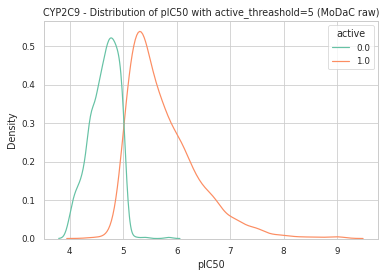

In [64]:
raw = pd.read_csv(data_dir +target.lower()+'_chembl_smiles_active_th5.csv')
fig, ax = plt.subplots(figsize = (6,4))
sns.kdeplot(data=raw, x="pIC50", hue="active", palette="Set2")
plt.title(target.upper()+' - Distribution of pIC50 with active_threashold=5 (MoDaC raw)')
plt.xlabel('pIC50')
plt.show()